In [1]:
# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 8,8
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [14]:
import numpy as np
import javabridge
import bioformats
from itkwidgets import view
from sklearn.externals import joblib

In [4]:
# Ignore warnings in notebook
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Create a temporary python PATH to the module that we are using for the analysis
import sys
sys.path.insert(0, "/Users/Espenel/Desktop/Mini-Grant-Image-analysis/2018/Chloe/ChromosomeDetectionChloe/utils")

In [6]:
from chromosome_dsb import *

# Loading a typical image using bioformats

In [7]:
javabridge.start_vm(class_path=bioformats.JARS)

In [8]:
path = '/Users/Espenel/Desktop/Mini-Grant-Image-analysis/2018/Chloe/data_chloe/cku-exo1_002/2017-04-12_RAD51-HTP3_cku80-exo1_002_visit_13_D3D_ALX.dv'

In [9]:
img = load_data.load_bioformats(path, channel = 3, no_meta_direct = True)

In [13]:
view(visualization.convert_view(img))

Viewer(gradient_opacity=0.22, rendered_image=<itkImagePython.itkImageUS3; proxy of <Swig Object of type 'itkIm…

# Sliding Window

In [15]:
clf = joblib.load("/Users/Espenel/Desktop/Mini-Grant-Image-analysis/2018/Chloe/clf_scaler/clf")
scaler = joblib.load("/Users/Espenel/Desktop/Mini-Grant-Image-analysis/2018/Chloe/clf_scaler/scaler")

In [16]:
import time

In [17]:
tp1 = time.time()
result = search.rolling_window(img, clf, scaler)
tp2 = time.time()

In [18]:
print("It took {}sec to find the chromosomes in 1 Zstack".format(int(tp2-tp1)))

It took 288sec to find the chromosomes in 1 Zstack


In [20]:
heat_map = visualization.heatmap(result)

In [22]:
view(visualization.convert_view(heat_map))

Viewer(gradient_opacity=0.22, rendered_image=<itkImagePython.itkImageUS3; proxy of <Swig Object of type 'itkIm…

### Max projection and check how the result looks like

In [23]:
proj = np.amax(img, axis=0)

### When boxes are overlapping, only keep the highest probability one

In [24]:
box = search.non_max_suppression(result, probaThresh=0.01, overlapThresh=0.3)

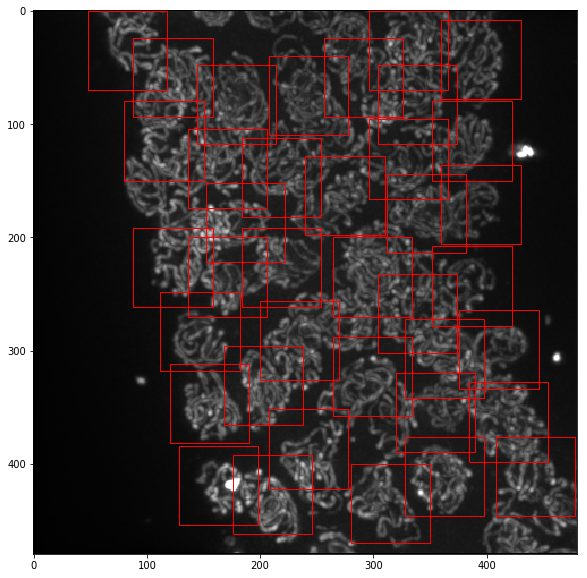

In [25]:
import matplotlib.patches as patches
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.imshow(proj, vmax = 150000)
for rec in box: 
    rect = patches.Rectangle((rec[0],rec[1]),70,70,linewidth=1,edgecolor='r',facecolor='none')
    # Add the patch to the Axes
    ax.add_patch(rect)

# Save the result

In [26]:
#path = "/Users/Espenel/Desktop/Mini-Grant-Image-analysis/2018/Chloe/13/"

In [27]:
#load_data.save_file(path, "bbox_3D", box, model=False)
#load_data.save_file(path, "bbox_3D", binary, model=False)